In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Advertising.csv', index_col='ID')

In [3]:
df.head()

,TV,Radio,Newspaper,Sales
ID,,,,
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [5]:
#we will use only one numerical feature
#df = df[['TV', 'Radio', 'Newspaper', 'Sales']]

In [6]:
len(df)

200

In [7]:
df.head()

,TV,Radio,Newspaper,Sales
ID,,,,
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


# What is the relationship between each feature and the target variable

In [8]:
import matplotlib.pyplot as plt

Text(18.125, 0.5, 'Sales')

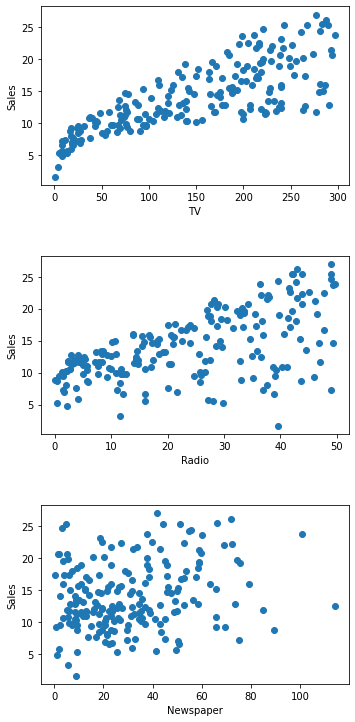

In [9]:
fig, axs = plt.subplots(3, 1)
fig.set_figwidth(5)
fig.set_figheight(10)
fig.tight_layout(h_pad = 5)

axs[0].scatter(df['TV'], df['Sales'])
axs[0].set_xlabel('TV')
axs[0].set_ylabel('Sales')

axs[1].scatter(df['Radio'], df['Sales'])
axs[1].set_xlabel('Radio')
axs[1].set_ylabel('Sales')

axs[2].scatter(df['Newspaper'], df['Sales'])
axs[2].set_xlabel('Newspaper')
axs[2].set_ylabel('Sales')


```
Is there a relationship between ads and sales?
How strong is that relationship?
Which ad types contribute to sales?
```

# Splitting data into training and test sets

```

Training set - the portion of data used for training the algorithm, in our case determining the coefficients of the line

Test set - data that the algorithm hasn't seen yet, used to evaluate the model

```

In [10]:
df.head()

,TV,Radio,Newspaper,Sales
ID,,,,
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [11]:
df = df[['TV', 'Sales']]

In [12]:
df.head()

,TV,Sales
ID,,
1,230.1,22.1
2,44.5,10.4
3,17.2,9.3
4,151.5,18.5
5,180.8,12.9


In [13]:
df.columns.difference(['Sales'])

Index(['TV'], dtype='object')

In [14]:
df[df.columns.difference(['Sales'])]

,TV
ID,
1,230.1
2,44.5
3,17.2
4,151.5
5,180.8
...,...
196,38.2
197,94.2
198,177.0


In [15]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(df[df.columns.difference(['Sales'])],df['Sales'], test_size=0.2, random_state=42)

In [16]:
len(xTrain), len(xTest)

(160, 40)

In [17]:
xTrain.head()

,TV
ID,
80,116.0
198,177.0
39,43.1
25,62.3
123,224.0


In [18]:
xTest.head()

,TV
ID,
96,163.3
16,195.4
31,292.9
159,11.7
129,220.3


In [19]:
yTrain.head()

ID
80     11.0
198    12.8
39     10.1
25      9.7
123    11.6
Name: Sales, dtype: float64

In [21]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training data
regr.fit(xTrain, yTrain)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
regr.coef_, regr.intercept_  #Sales = 7.1 + 0.04*TV

(array([0.04652973]), 7.119638430592953)

In [24]:
# Make predictions using the testing set
y_pred = regr.predict(xTest)

In [25]:
y_pred

array([14.71794394, 16.2115484 , 20.74819743,  7.66403631, 17.37013877,
       10.61402143, 17.2072847 ,  9.44612512, 17.46785121, 15.2669948 ,
        8.58532504,  9.73460946, 18.03086098,  7.37089899, 13.61053628,
       15.03899911,  7.45930549, 16.31391381, 10.62332738, 18.16579721,
       17.79821232, 10.27435438,  8.88776831, 18.79394862, 10.33019006,
        9.60897918, 17.05373658, 13.60123034, 11.17703121,  7.51048819,
       16.41627922, 10.339496  , 16.37440246,  7.90599093, 20.18053468,
       18.203021  ,  9.36702457, 19.85482655, 12.57292322,  8.39920611])

In [27]:
np.array(yTest)

array([16.9, 22.4, 21.4,  7.3, 24.7, 12.6, 22.3,  8.4, 11.5, 14.9,  9.5,
        8.7, 11.9,  5.3, 10.3, 11.7,  5.5, 16.6, 11.3, 18.9, 19.7, 12.5,
       10.9, 22.2,  9.3,  8.1, 21.7, 13.4, 10.6,  5.7, 10.6, 11.3, 23.7,
        8.7, 16.1, 20.7, 11.6, 20.8, 11.9,  6.9])

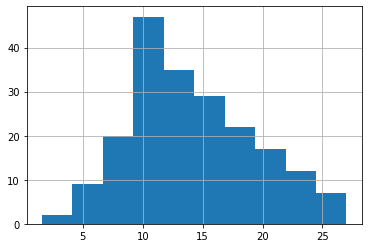

In [30]:
df['Sales'].hist()

Coefficients: 
 [0.04652973]
Mean absolute error: 2.44
Mean squared error: 10.20
Root mean squared error: 3.19
R-squared: 0.68


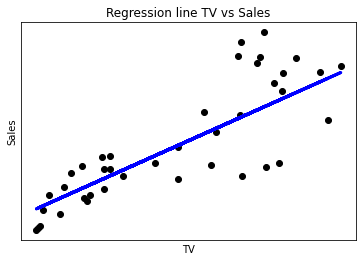

In [28]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean absolute error: %.2f'
      % mean_absolute_error(yTest, y_pred))

print('Mean squared error: %.2f'
      % mean_squared_error(yTest, y_pred))

print('Root mean squared error: %.2f'
      % np.sqrt(mean_squared_error(yTest, y_pred)))

print('R-squared: %.2f'
      % r2_score(yTest, y_pred))



# Plot outputs
plt.scatter(xTest, yTest,  color='black')
plt.plot(xTest, y_pred, color='blue', linewidth=3)

plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('Regression line TV vs Sales')

plt.xticks(())
plt.yticks(())

plt.show()



```
* A "unit" increase in TV ad spending is associated with a 0.047537 "unit" increase in Sales
* Or more clearly: An additional $1,000 spent on TV ads is associated with an increase in sales of 47.537 
```

In [31]:
y_train_pred = regr.predict(xTrain)
y_train_pred

array([12.51708754, 15.3554013 ,  9.12506995, 10.01844084, 17.54229878,
        8.89707426, 10.40463763, 13.97346821, 11.98664858, 10.66985711,
       10.75826361, 14.95524559,  7.52444711,  7.48257035, 10.67451009,
       13.14058597, 10.53492088, 20.59930229,  8.03162121, 16.31391381,
       20.34804172, 15.72298619, 12.37284537,  8.22704609, 20.64583202,
        8.02231526, 20.78076825,  7.98974445, 13.36858167,  8.31079961,
       11.79122369, 10.85132307, 15.88584026, 15.3554013 , 12.96842596,
       16.87227062, 13.76873738, 15.72298619, 17.46785121, 18.36587507,
        7.91994985, 12.72647134, 11.29335554, 16.01147054, 10.63263333,
       16.10918298, 11.10723661, 19.53842436,  8.95756291, 19.27785785,
        7.73383092, 16.13244785, 20.9110515 , 19.4779357 , 17.10957226,
       14.08513957, 13.24760436,  9.79509812, 18.29142749, 13.6942898 ,
       15.53221428, 11.64232855, 17.37944471, 13.64776007, 19.00333242,
       11.59579881, 10.19525383, 18.25420371, 15.29491264, 18.29

In [32]:
np.array(yTrain)

array([11. , 12.8, 10.1,  9.7, 11.6,  7.6, 10.5, 14.6, 10.4, 12. , 14.6,
       11.7,  7.2,  6.6,  9.4, 11. , 10.9, 25.4,  7.6, 11.7, 15. , 15.5,
       11.9,  9.2, 12.8,  6.6, 20.7,  6.7, 11.2,  9.5, 10.7,  8.8, 14.9,
       17.1, 15.9, 15.9, 15. , 20.7, 11.7, 21.8,  9.3, 14.2, 10.6, 17.3,
        9.9, 15.2, 13.3, 25.4, 10.8, 24.2,  5.6, 19.2, 23.8, 17.4, 17.4,
       17.3, 12.9, 11.8, 15.9, 15.5, 12.9,  9.6, 20.1, 10.3, 19.8, 11.4,
        8.6, 15.7, 14.1, 13.2,  8. , 22.1, 25.5, 19. , 18.3, 15.2, 18. ,
        8.5, 18. , 18.9, 16.6,  5.3,  3.2, 15.3, 12. , 15.5, 17.6, 25.4,
       12.3, 21.5, 17.1, 23.2, 11.5, 15.6, 12.9,  9.6, 18.5, 19.2, 21.2,
       19.6, 10.5, 11.8, 22.6,  9.7, 11.8,  9.5, 13.2, 13.4,  7.3, 13.6,
       20.2, 12.2, 16.7,  4.8,  9.7, 18.4, 14.5, 12.7, 24.4,  8.8, 27. ,
       10.8, 12.2, 26.2, 14. , 20.2,  8.7, 11.4,  9.7, 23.8, 14.8, 12.9,
       12.5, 13.2, 14.4,  5.9,  9.7, 14.7, 10.1, 19.6, 10.4, 22.6, 10.1,
        1.6, 11.6, 14.7, 17.2, 12.2, 16. , 17. ,  7

In [37]:
x = [10,1]
y = 1
print('wfee %s rgvew'%x)
print('wfee %s rgvew %s'%(x,y))

wfee [10, 1] rgvew
wfee [10, 1] rgvew 1


Mean absolute error: 2.58
Mean squared error: 10.60
Root mean squared error: 3.26
R-squared: 0.59


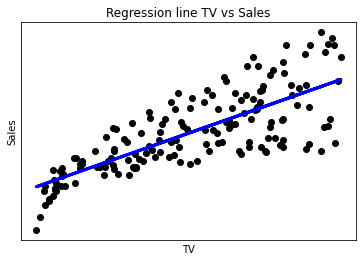

In [33]:
y_train_pred = regr.predict(xTrain)

# The mean squared error
print('Mean absolute error: %.2f'
      % mean_absolute_error(yTrain, y_train_pred))

print('Mean squared error: %.2f'
      % mean_squared_error(yTrain, y_train_pred))

print('Root mean squared error: %.2f'
      % np.sqrt(mean_squared_error(yTrain, y_train_pred)))

print('R-squared: %.2f'
      % r2_score(yTrain, y_train_pred))



# Plot outputs
plt.scatter(xTrain, yTrain,  color='black')
plt.plot(xTrain, y_train_pred, color='blue', linewidth=3)

plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('Regression line TV vs Sales')

plt.xticks(())
plt.yticks(())

plt.show()




# Add more features (r square increases)

In [38]:
df = pd.read_csv('Advertising.csv', index_col='ID')

In [39]:
df.head()

,TV,Radio,Newspaper,Sales
ID,,,,
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [40]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(df[df.columns.difference(['Sales'])],df['Sales'], test_size=0.2, random_state=42)

In [41]:
xTrain.head()

,Newspaper,Radio,TV
ID,,,
80,23.1,7.7,116.0
198,6.4,9.3,177.0
39,35.1,26.7,43.1
25,18.3,12.6,62.3
123,15.6,2.4,224.0


In [42]:
yTest.head()

ID
96     16.9
16     22.4
31     21.4
159     7.3
129    24.7
Name: Sales, dtype: float64

In [50]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training data
regr.fit(xTrain, yTrain)

# Make predictions using the testing set
y_pred = regr.predict(xTest)

In [52]:
regr.coef_, regr.intercept_

(array([0.00276111, 0.18919505, 0.04472952]), 2.9790673381226274)

In [53]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean absolute error: %.2f'
      % mean_absolute_error(yTest, y_pred))

print('Mean squared error: %.2f'
      % mean_squared_error(yTest, y_pred))

print('Root mean squared error: %.2f'
      % np.sqrt(mean_squared_error(yTest, y_pred)))

print('R-squared: %.2f'
      % r2_score(yTest, y_pred))

Coefficients: 
 [0.00276111 0.18919505 0.04472952]
Mean absolute error: 1.46
Mean squared error: 3.17
Root mean squared error: 1.78
R-squared: 0.90


# Try only on TV and Radio

In [57]:
df = pd.read_csv('Advertising.csv', index_col='ID')

In [58]:
df.head()

,TV,Radio,Newspaper,Sales
ID,,,,
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [59]:
df = df[['TV','Radio', 'Sales']]

In [60]:
df.head()

,TV,Radio,Sales
ID,,,
1,230.1,37.8,22.1
2,44.5,39.3,10.4
3,17.2,45.9,9.3
4,151.5,41.3,18.5
5,180.8,10.8,12.9


In [61]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(df[df.columns.difference(['Sales'])],df['Sales'], test_size=0.2, random_state=42)

In [62]:
xTrain.head()

,Radio,TV
ID,,
80,7.7,116.0
198,9.3,177.0
39,26.7,43.1
25,12.6,62.3
123,2.4,224.0


In [63]:
yTest.head()

ID
96     16.9
16     22.4
31     21.4
159     7.3
129    24.7
Name: Sales, dtype: float64

In [64]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training data
regr.fit(xTrain, yTrain)

# Make predictions using the testing set
y_pred = regr.predict(xTest)

In [65]:
regr.coef_, regr.intercept_

(array([0.19066726, 0.0447283 ]), 3.028255250783305)

In [67]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean absolute error: %.2f'
      % mean_absolute_error(yTest, y_pred))

print('Mean squared error: %.2f'
      % mean_squared_error(yTest, y_pred))

print('Root mean squared error: %.2f'
      % np.sqrt(mean_squared_error(yTest, y_pred)))

print('R-squared: %.2f'
      % r2_score(yTest, y_pred))

Coefficients: 
 [0.19066726 0.0447283 ]
Mean absolute error: 1.44
Mean squared error: 3.14
Root mean squared error: 1.77
R-squared: 0.90


In [68]:
df = pd.read_csv('Advertising.csv', index_col='ID')

In [69]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000
